In [1]:
from datetime import datetime
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import combinations

In [2]:
def load_data(in_file, brands_to_load = None, max_limit = 1404, verbose = False):
    """Loads data from the given data file.
    If the brands to be loaded is less than the maximum rows in the datafile, randomize the loading.
    Args:
      brands_to_load .... Number of brands to be loaded.
      in_file       .... A string representing the location and datafile name to be loaded.
    Returns:
      None. The data is loaded into the global variables."""
    
    if brands_to_load is None:
        brands_to_load = max_limit 
    
    #Randomize Loading
    if brands_to_load != max_limit:
        choices = sorted(random.sample(range(max_limit), brands_to_load))
        max_row_id = max(choices)
    else:
        choices = range(max_limit)
        max_row_id = max_limit-1
    
    brand_no = 0
    cur_idx = 0
            
    with open(in_file) as data_file:
        for row in data_file:
            if brand_no > max_row_id:
                break
            if brand_no != choices[cur_idx]:
                brand_no += 1
                continue
            else:
                followers = row.split()
                brand = followers.pop(0)
                followers_count = len(followers)
                
                #Ignoring brands with less than 1000 followers
                if followers_count > 1000:  
                    followers = [int(x) for x in followers]
                    BRAND_FOLLOWERS[brand] = set(followers)
                    BRANDS_LIST.append(brand)
                    
                    for f in followers:
                        if f not in UNIQUE_FOLLOWERS:
                            UNIQUE_FOLLOWERS[f] = set()
                        UNIQUE_FOLLOWERS[f].add(brand)
                    print('Loaded',brand,'-',followers_count,'followers')
                else:
                    print('Skipped',brand,'-',followers_count,'followers')
                    
                brand_no += 1
                cur_idx += 1
                    
    return

In [3]:
BRANDS_LIST = []
UNIQUE_FOLLOWERS = {}
BRAND_FOLLOWERS = {}
brands_to_load = 50
max_rows = 1404
verbose = True
load_data('data/brand_followers_final.tsv', brands_to_load, max_rows, verbose)
N_BRANDS = len(BRAND_FOLLOWERS)
N_FOLLOWERS = len(UNIQUE_FOLLOWERS)
print('No. of Unique Followers', N_FOLLOWERS)
print('No. of Brands', N_BRANDS)

Loaded 7up - 34448 followers
Loaded airwickmexico - 8186 followers
Loaded balancebar - 6061 followers
Loaded beneful - 8169 followers
Loaded bmw - 349812 followers
Loaded canon_camera - 179086 followers
Loaded chexcereal - 2913 followers
Loaded clearasil - 10876 followers
Loaded dolcegabbana - 500001 followers
Loaded fisherpaykel - 3643 followers
Loaded genesistoday - 2446 followers
Loaded goddessgarden - 2227 followers
Loaded greenworks - 3304 followers
Loaded hdnaturals - 1586 followers
Loaded hp - 500001 followers
Loaded jaguar - 149103 followers
Loaded jemkidd - 10958 followers
Loaded klondikebar - 62491 followers
Loaded kroger - 61665 followers
Loaded livingharvest - 2763 followers
Loaded lovemyphilly - 30365 followers
Loaded makeupforeverus - 188576 followers
Loaded marcanthony - 500001 followers
Loaded markwinsgirls - 1468 followers
Loaded miltonsbaking - 1669 followers
Loaded minutemaidid - 43851 followers
Loaded monsterenergysa - 13274 followers
Loaded nathanpacheco - 4832 fol

In [4]:
def get_followers(brand):
    return BRAND_FOLLOWERS[brand]

def set_followers(brand, followers):
    BRAND_FOLLOWERS[brand] = followers
    
def set_brands(user, brands):
    UNIQUE_FOLLOWERS[user] = brands

def get_brands(user):
    return UNIQUE_FOLLOWERS[user]


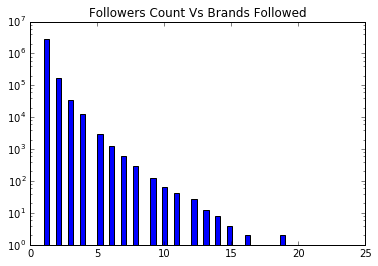

In [45]:
def plot_histogram(data,title):
    hist, bins = np.histogram(np.asarray(data),bins=50)    
    width = 0.9 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.yscale("log")
    plt.bar(center, hist, align='center', width=width)
    plt.title(title)

plot_histogram([len(v) for v in list(UNIQUE_FOLLOWERS.values())], 'Followers Count Vs Brands Followed')

In [6]:
def sample_followers(brands_min, pct):
    ffollowers = list(map(lambda x: x[0], filter(lambda x: len(x[1]) >= brands_min, UNIQUE_FOLLOWERS.items())))
    sample = random.sample(ffollowers, int(len(ffollowers) * pct))
    print('Sample taken: %d/%d followers.' % (len(sample),len(list(ffollowers))))
    return sample

follower_ids = sample_followers(brands_min=5, pct= 0.4)

Sample taken: 2806/7016 followers.


In [7]:
def remove_links(followers):
    brands_to_remove = {}
    for follower_id in followers:
        brand = random.choice(list(get_brands(follower_id)))
        brands_to_remove[follower_id] = brand
        set_brands(follower_id,get_brands(follower_id) - set([brand]))
        set_followers(brand, get_followers(brand) - set([follower_id]))
        print('Removed link', follower_id,'-',brand)
    return brands_to_remove
removed_brands = remove_links(follower_ids)

Removed link 293064952 - sunchips
Removed link 541083095 - popsicle
Removed link 574007799 - sunchips
Removed link 1651057123 - popsicle
Removed link 2471830411 - sunchips
Removed link 158305305 - nestle
Removed link 743318610 - klondikebar
Removed link 43241699 - turkeyhilldairy
Removed link 2356340802 - popsicle
Removed link 583828181 - hp
Removed link 2371886892 - dolcegabbana
Removed link 1918233164 - hp
Removed link 2520018634 - dolcegabbana
Removed link 71314666 - lovemyphilly
Removed link 2257948802 - jaguar
Removed link 95813615 - popsicle
Removed link 541497276 - 7up
Removed link 85215435 - sunchips
Removed link 15872524 - jaguar
Removed link 35934112 - balancebar
Removed link 567572019 - nestle
Removed link 236684323 - natures_pride
Removed link 1923468914 - sunchips
Removed link 1599353888 - klondikebar
Removed link 16362566 - makeupforeverus
Removed link 2274323100 - bmw
Removed link 59344550 - natures_pride
Removed link 2373829092 - hp
Removed link 274567031 - klondikebar


In [41]:
def get_brands_not_followed(follower_ids):
    brands = {}
    for follower_id in follower_ids:
        brands_not_followed = set(BRANDS_LIST) - get_brands(follower_id)
        brands[follower_id] = random.choice(list(brands_not_followed))
    return brands

brands_for_training = get_brands_not_followed(follower_ids)

In [8]:
def get_similarity_matrix():
    DIST_MAT = np.zeros((N_BRANDS,N_BRANDS))
    
    for tuple_pair in combinations(enumerate(BRANDS_LIST),2):
        b1 = get_followers(tuple_pair[0][1])
        b2 = get_followers(tuple_pair[1][1])
        
        #Jaccard Similarity Measure
        common_connections = len(b1.intersection(b2))
        total_connections = len(b1) + len(b2) - common_connections #More efficient than set(b1).union(b2)
        sim = common_connections/total_connections
        
        #Symmetrix Distance Matrix
        DIST_MAT[tuple_pair[0][0] , tuple_pair[1][0]] = DIST_MAT[tuple_pair[1][0] , tuple_pair[0][0]] = sim
    return DIST_MAT

DIST_MAT = get_similarity_matrix()
print('%d x %d Similarity Matrix created.'%(N_BRANDS,N_BRANDS))

50 x 50 Similarity Matrix created.


In [31]:
def get_rank(sorted_scores, removed_brand=None):
    rank = {}
    
    for idx, brand_score in enumerate(sorted_scores):
        if removed_brand is not None and brand_score[0] == removed_brand:
            return idx + 1
        elif removed_brand is None:
            rank[brand_score[0]] = idx + 1
            
    if removed_brand is None:
        return rank
    else:
        return None

In [38]:
def get_prediction(follower_id, brands_to_predict=None):
    
    brands_followed = get_brands(follower_id)
        
    if brands_to_predict is not None and brands_to_predict not in brands_followed: 
        brands_not_followed = set(BRANDS_LIST) - brands_followed
    else:
        brands_not_followed = set(BRANDS_LIST)
            
    scores = {}
    for brand_not_followed in brands_not_followed:
        bnf_idx = BRANDS_LIST.index(brand_not_followed)
        scores[brand_not_followed] = 0
        
        for brand_followed in brands_followed:
            bf_idx = BRANDS_LIST.index(brand_followed)
            scores[brand_not_followed] += DIST_MAT[bf_idx, bnf_idx]
                
        prediction = sorted(scores.items(), key=lambda x: x[1]/len(brands_followed), reverse=True)    
    if brands_to_predict is not None:
        prediction_rank = get_rank(prediction,brands_to_predict)
    else:
        prediction_rank = get_rank(prediction)
    return prediction_rank

In [42]:
def predict(follower_ids, brands_to_predict):
    rank_prediction = {}
    for follower_id in follower_ids:
        rank_prediction[follower_id] = get_prediction(follower_id, brands_to_predict[follower_id])
    return rank_prediction
positive_records = predict(follower_ids, removed_brands)
negative_records = predict(follower_ids, brands_for_training)

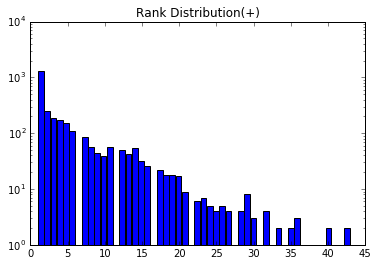

In [46]:
plot_histogram(list(positive_records.values()),'Rank Distribution(+)')

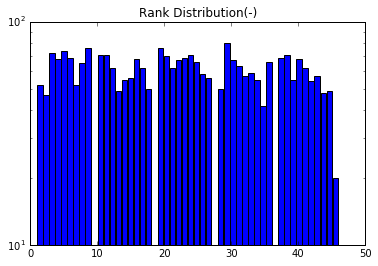

In [47]:
plot_histogram(list(negative_records.values()),'Rank Distribution(-)')

In [77]:
max(positive_records.items(), key=lambda x: x[1])

(546465747, 43)

In [85]:
def get_worst_prediction(prediction, brands, source='+'):
    if source == '+':
        id_worst,rank_worst = max(prediction.items(), key=lambda x: x[1])
    elif source == '-':
        id_worst,rank_worst = min(prediction.items(), key=lambda x: x[1])
    print('(%s) Worst Prediction %d for brand %s followed by %s'%(source, rank_worst, brands[id_worst], id_worst))
    print('Brands Followed', get_brands(id_worst))
get_worst_prediction(positive_records,removed_brands, '+')
get_worst_prediction(negative_records,brands_for_training,'-')

(+) Worst Prediction 43 for brand nathanpacheco followed by 546465747
Brands Followed {'sunchips', 'natures_pride', 'klondikebar', 'popsicle', 'nestle'}
(-) Worst Prediction 1 for brand popsicle followed by 240354008
Brands Followed {'dolcegabbana', 'sunchips', 'klondikebar', 'chexcereal'}


In [64]:
def get_statistics(values):
    import statistics
    mean = statistics.mean(values)
    median = statistics.median(values)
    maximum = max(values)
    minimum = min(values)
    return [mean, median, maximum, minimum]

positive_statistics = get_statistics(positive_records.values())
print('Rank Statistics(+)', positive_statistics)
negative_statistics = get_statistics(negative_records.values())
print('Rank Statistics(-)', negative_statistics)

Rank Statistics(+) [4.691732002851033, 2.0, 43, 1]
Rank Statistics(-) [22.763720598717036, 23.0, 46, 1]


In [71]:
def get_ranks_by_followed_brands_count(follower_ids, rank_prediction):

    statistics = {}
    brands_followed = {}
    for follower_id in follower_ids:
        count = len(get_brands(follower_id))
        if count in brands_followed.keys():
            brands_followed[count].append(rank_prediction[follower_id])
        else:
            brands_followed[count] = [rank_prediction[follower_id]]
    for key in brands_followed:
        statistics[key] = get_statistics(brands_followed[key])
    
    return statistics

positive_binned_statistics = get_ranks_by_followed_brands_count(follower_ids, positive_records)
negative_binned_statistics = get_ranks_by_followed_brands_count(follower_ids, negative_records)

In [72]:
positive_binned_statistics

{4: [4.593371574251115, 1, 41, 1],
 5: [4.589783281733746, 2.0, 43, 1],
 6: [4.9397993311036785, 2, 43, 1],
 7: [4.561151079136691, 3, 35, 1],
 8: [4.8108108108108105, 3.0, 24, 1],
 9: [7.296296296296297, 4, 29, 1],
 10: [8.647058823529411, 4, 35, 1],
 11: [3.8, 4.5, 7, 1],
 12: [5.076923076923077, 4, 14, 1],
 13: [1.6, 1, 4, 1],
 14: [18.333333333333332, 22, 30, 3],
 16: [7, 7, 7, 7],
 18: [2, 2, 2, 2],
 19: [5, 5, 5, 5],
 23: [1, 1, 1, 1]}

In [73]:
negative_binned_statistics

{4: [22.68642447418738, 22, 46, 1],
 5: [23.789473684210527, 24.0, 45, 1],
 6: [21.79933110367893, 21, 44, 1],
 7: [21.553956834532375, 23, 43, 1],
 8: [23.16216216216216, 22.5, 42, 2],
 9: [20.555555555555557, 20, 37, 3],
 10: [22.235294117647058, 24, 39, 2],
 11: [23.2, 24.5, 36, 9],
 12: [23.23076923076923, 26, 37, 7],
 13: [22.2, 23, 33, 12],
 14: [22.666666666666668, 31, 31, 6],
 16: [10, 10, 10, 10],
 18: [10, 10, 10, 10],
 19: [10, 10, 10, 10],
 23: [8, 8, 8, 8]}

In [98]:
training_data = []
for follower_id in follower_ids:
    count = len(get_brands(follower_id))
    p_record = [positive_records[follower_id]] + positive_statistics + positive_binned_statistics[count] + [1]
    n_record = [negative_records[follower_id]] + negative_statistics + negative_binned_statistics[count] + [0]
    training_data.append(p_record)
    training_data.append(n_record)
training_data = np.asarray(training_data)

In [102]:
training_data[0]

array([  1.        ,   4.691732  ,   2.        ,  43.        ,
         1.        ,   4.59337157,   1.        ,  41.        ,
         1.        ,   1.        ])

In [103]:
X = training_data[:,:-1]
y = training_data[:,-1]

In [105]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y)
model.predict(X)

array([ 1.,  0.,  1., ...,  0.,  1.,  0.])